<a href="https://colab.research.google.com/github/d-chacon/Ciencia_Datos_Taller_1/blob/main/Proyecto%20OPAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns; sns.set()  # for plot styling
import locale
from difflib import SequenceMatcher
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
archivo_marca1= pd.read_excel("Informacion Bases de datos Comercial Marca 1.xlsx", sheet_name=None)
archivo_marca2_10= pd.read_excel("Informacion Bases de datos Comercial Marca 2 - 10.xlsx", sheet_name=None)

In [ ]:
archivo_marca2_10.keys()

dict_keys(['Marca 2', 'Marca 3', 'Marca 4', 'Marca 5', 'Marca 6', 'Marca 7', 'marca 8', 'marca 9', 'marca 10'])

In [ ]:
def sacar_anio(entrada):
    return entrada.year
def sacar_mes(entrada):
    return entrada.month
def sacar_dia(entrada):
    return entrada.day

In [ ]:
def obt_horas_minutos_marca4(entrada):
    entrada=  entrada.replace(".0","")
    return entrada.split(":")[1] + ":"+ entrada.split(":")[2]

In [ ]:
def obt_horas_marca8(entrada):
    return entrada.split(":")[0]
def obt_horas_minutos_marca8(entrada):
    return entrada[:-3]

In [ ]:
def obt_horas_minutos_marca10(entrada):
    return entrada.split(":")[1] + ":"+ entrada.split(":")[2]

In [ ]:
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')

'es_ES.UTF-8'

In [ ]:
marca1=archivo_marca1['MARCA 1'].copy()
marca1=marca1.rename(columns={'Fecha de Venta':'fecha_de_venta','Centro de consumo':'tienda','Ventas Netas':'ventas','ZONA':'muelle','HORA':'hora_entera','TRANSACCIONES':'transacciones','SEMANA':'semana','Año':'anio_entero','Mes':'mes_entero','Día':'dia_entero','Mes(2)':'mes_string'})
marca1['marca'] = 'marca1'
marca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83370 entries, 0 to 83369
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_de_venta  83370 non-null  datetime64[ns]
 1   tienda          83370 non-null  object        
 2   ventas          83370 non-null  int64         
 3   muelle          83370 non-null  object        
 4   hora_entera     83282 non-null  float64       
 5   transacciones   83282 non-null  float64       
 6   semana          83370 non-null  int64         
 7   anio_entero     83370 non-null  int64         
 8   mes_entero      83370 non-null  int64         
 9   dia_entero      83370 non-null  int64         
 10  mes_string      83370 non-null  object        
 11  marca           83370 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 7.6+ MB


In [ ]:
marca2=archivo_marca2_10['Marca 2'].copy()
# marca2=marca2.drop(columns=['Unnamed: 7','Unnamed: 8','Unnamed: 9'])
marca2=marca2.rename(columns={'Fecha':'fecha_de_venta','Tienda':'tienda','Ventas':'ventas','Muelle':'muelle','Hora entera':'hora_entera','Transacciones':'transacciones','Unidades':'unidades'})
marca2['marca'] = 'marca2'
marca2['anio_entero'] = marca2['fecha_de_venta'].apply(sacar_anio)
marca2['mes_entero'] = marca2['fecha_de_venta'].apply(sacar_mes)
marca2['dia_entero'] = marca2['fecha_de_venta'].apply(sacar_dia)
marca2['mes_string'] = marca2['fecha_de_venta'].dt.strftime('%B')
marca2['semana'] = marca2['fecha_de_venta'].dt.week
# dates.dt.week
marca2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22297 entries, 0 to 22296
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tienda          22297 non-null  object        
 1   hora_entera     22297 non-null  int64         
 2   fecha_de_venta  22297 non-null  datetime64[ns]
 3   ventas          22297 non-null  float64       
 4   transacciones   22297 non-null  int64         
 5   unidades        22297 non-null  int64         
 6   muelle          22297 non-null  object        
 7   marca           22297 non-null  object        
 8   anio_entero     22297 non-null  int64         
 9   mes_entero      22297 non-null  int64         
 10  dia_entero      22297 non-null  int64         
 11  mes_string      22297 non-null  object        
 12  semana          22297 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 2.2+ MB


In [ ]:
marca2.head()

,tienda,hora_entera,fecha_de_venta,ventas,transacciones,unidades,muelle,marca,anio_entero,mes_entero,dia_entero,mes_string,semana
0,Tienda A,7,2022-01-01,27121380.0,7,23,Internacional Oriente,marca2,2022,1,1,January,52
1,Tienda A,8,2022-01-01,4636320.0,3,5,Internacional Oriente,marca2,2022,1,1,January,52
2,Tienda A,9,2022-01-01,10518300.0,4,12,Internacional Oriente,marca2,2022,1,1,January,52
3,Tienda A,10,2022-01-01,9620520.0,6,16,Internacional Oriente,marca2,2022,1,1,January,52
4,Tienda A,11,2022-01-01,22212840.0,7,21,Internacional Oriente,marca2,2022,1,1,January,52


In [ ]:
marca4=archivo_marca2_10['Marca 4'].copy()
marca4=marca4.rename(columns={'FECHA':'fecha_de_venta','TIENDA1':'tienda','TOTAL_LOC':'ventas','Muelle':'muelle','HORA ENTERA':'hora_entera','HORA':'hora_minutos','TRANSACCIONES':'transacciones','UNIDADES':'unidades','CATEGORÍA':'categoria','Num fact':'num_fact','DESCRIPCION':'descripcion','PRECIO_NETO_LOC':'precio_neto_loc','PRECIO_BRUTO_LOC':'precio_bruto_loc','IMPUESTO_LOC':'impuesto_loc','DESCUENTO_LOC':'descuento_loc'})
marca4['marca'] = 'marca4'
marca4['anio_entero'] = marca4['fecha_de_venta'].apply(sacar_anio)
marca4['mes_entero'] = marca4['fecha_de_venta'].apply(sacar_mes)
marca4['dia_entero'] = marca4['fecha_de_venta'].apply(sacar_dia)
marca4['mes_string'] = marca4['fecha_de_venta'].dt.strftime('%B')
marca4['semana'] = marca4['fecha_de_venta'].dt.week
marca4['hora_minutos'] = marca4['hora_minutos'].apply(obt_horas_minutos_marca4)

In [ ]:
marca4['ventas_sin_iva'] = round(marca4['precio_neto_loc'] * marca4['unidades'],0)
marca4['impuesto_loc'] = round(marca4['impuesto_loc'],0)

In [ ]:
marca4['categoria']=marca4['categoria'].str.lower()

In [ ]:
marca4['categoria'].unique()

array(['alimentos y bebidas retail', 'golosinas', 'cuidado personal',
       'souvenirs', 'textiles de regalo', 'cafe', 'artesanias', nan,
       'vicios', 'juegos y juguetes', 'joyeria', 'articulos de viaje',
       'libros', 'revistas y periodicos', 'productos de papel',
       'reposteria dulce', 'comida', 'tecnologia', 'complementos cafe',
       'textiles de playa'], dtype=object)

In [ ]:
marca4_dummies_cat = pd.get_dummies(marca4.categoria)
marca4_dummies_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037749 entries, 0 to 1037748
Data columns (total 19 columns):
 #   Column                      Non-Null Count    Dtype
---  ------                      --------------    -----
 0   alimentos y bebidas retail  1037749 non-null  uint8
 1   artesanias                  1037749 non-null  uint8
 2   articulos de viaje          1037749 non-null  uint8
 3   cafe                        1037749 non-null  uint8
 4   comida                      1037749 non-null  uint8
 5   complementos cafe           1037749 non-null  uint8
 6   cuidado personal            1037749 non-null  uint8
 7   golosinas                   1037749 non-null  uint8
 8   joyeria                     1037749 non-null  uint8
 9   juegos y juguetes           1037749 non-null  uint8
 10  libros                      1037749 non-null  uint8
 11  productos de papel          1037749 non-null  uint8
 12  reposteria dulce            1037749 non-null  uint8
 13  revistas y periodicos      

In [ ]:
marca4_dummies_cat.columns

Index(['alimentos y bebidas retail', 'artesanias', 'articulos de viaje',
       'cafe', 'comida', 'complementos cafe', 'cuidado personal', 'golosinas',
       'joyeria', 'juegos y juguetes', 'libros', 'productos de papel',
       'reposteria dulce', 'revistas y periodicos', 'souvenirs', 'tecnologia',
       'textiles de playa', 'textiles de regalo', 'vicios'],
      dtype='object')

In [ ]:
marca4=pd.concat([marca4,marca4_dummies_cat],axis=1)
marca4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037749 entries, 0 to 1037748
Data columns (total 41 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   tienda                      1037749 non-null  object        
 1   muelle                      1037749 non-null  object        
 2   fecha_de_venta              1037749 non-null  datetime64[ns]
 3   hora_minutos                1037749 non-null  object        
 4   hora_entera                 1037749 non-null  int64         
 5   num_fact                    1037749 non-null  int64         
 6   transacciones               1037749 non-null  int64         
 7   descripcion                 1037749 non-null  object        
 8   unidades                    1037749 non-null  int64         
 9   precio_neto_loc             1037749 non-null  float64       
 10  precio_bruto_loc            1037749 non-null  float64       
 11  impuesto_loc            

In [ ]:
# marca4_dummies_desc = pd.get_dummies(marca4.descripcion)
# marca4_dummies_desc.info()

In [ ]:
marca4_agrupado=marca4.groupby(by=['tienda','anio_entero','mes_entero','dia_entero','hora_entera']).sum()[['ventas_sin_iva','precio_bruto_loc','impuesto_loc','descuento_loc','unidades','ventas','transacciones','alimentos y bebidas retail', 'artesanias', 'articulos de viaje',
       'cafe', 'comida', 'complementos cafe', 'cuidado personal', 'golosinas',
       'joyeria', 'juegos y juguetes', 'libros', 'productos de papel',
       'reposteria dulce', 'revistas y periodicos', 'souvenirs', 'tecnologia',
       'textiles de playa', 'textiles de regalo', 'vicios']].reset_index()

In [ ]:
columnas_esp=['tienda','muelle','fecha_de_venta','hora_entera','marca','anio_entero','mes_entero','dia_entero','mes_string','semana']

In [ ]:
marca4_conglomerado= marca4.drop_duplicates(subset=['tienda','anio_entero','mes_entero','dia_entero','hora_entera'])[columnas_esp].merge(marca4_agrupado,on=['tienda','anio_entero','mes_entero','dia_entero','hora_entera'],how="left")

In [ ]:
marca4_conglomerado=marca4_conglomerado.rename(columns={'precio_bruto_loc':'precio_bruto_total','impuesto_loc':'impuesto_total','descuento_loc':'descuento_total'})

In [ ]:
# marca4_conglomerado['categoria']= pd.Series(categoria_col)
# marca4_conglomerado['descripcion'] = pd.Series(descripcion_col)

In [ ]:
marca4_conglomerado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17766 entries, 0 to 17765
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tienda                      17766 non-null  object        
 1   muelle                      17766 non-null  object        
 2   fecha_de_venta              17766 non-null  datetime64[ns]
 3   hora_entera                 17766 non-null  int64         
 4   marca                       17766 non-null  object        
 5   anio_entero                 17766 non-null  int64         
 6   mes_entero                  17766 non-null  int64         
 7   dia_entero                  17766 non-null  int64         
 8   mes_string                  17766 non-null  object        
 9   semana                      17766 non-null  int64         
 10  ventas_sin_iva              17766 non-null  float64       
 11  precio_bruto_total          17766 non-null  float64   

In [ ]:
marca4_conglomerado.head()

,tienda,muelle,fecha_de_venta,hora_entera,marca,anio_entero,mes_entero,dia_entero,mes_string,semana,...,juegos y juguetes,libros,productos de papel,reposteria dulce,revistas y periodicos,souvenirs,tecnologia,textiles de playa,textiles de regalo,vicios
0,Tienda 1,Internacional Oriente,2022-01-01,0,marca4,2022,1,1,January,52,...,0,0,0,0,0,5,0,0,2,1
1,Tienda 1,Internacional Oriente,2022-01-01,1,marca4,2022,1,1,January,52,...,1,0,0,0,0,1,0,0,0,0
2,Tienda 1,Internacional Oriente,2022-01-01,3,marca4,2022,1,1,January,52,...,1,0,0,0,0,8,0,0,2,0
3,Tienda 1,Internacional Oriente,2022-01-01,4,marca4,2022,1,1,January,52,...,0,0,0,0,0,5,0,0,0,0
4,Tienda 1,Internacional Oriente,2022-01-01,5,marca4,2022,1,1,January,52,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
marca3=archivo_marca2_10['Marca 3'].copy()
marca3=marca3.drop(columns=['Unnamed: 9','Unnamed: 10'])
marca3=marca3.rename(columns={'FECHA':'fecha_de_venta','Cód tienda':'tienda','VENTAS':'ventas','UBICACIÓN':'muelle','Hora entera':'hora_entera','TRANSACCIONES':'transacciones','UNIDADES':'unidades','CATEGORÍA':'categoria','Tipo de tienda':'tipo_de_tienda'})
marca3= marca3[~(marca3['ventas']==0)]
marca3['marca'] = 'marca3'
marca3['anio_entero'] = marca3['fecha_de_venta'].apply(sacar_anio)
marca3['mes_entero'] = marca3['fecha_de_venta'].apply(sacar_mes)
marca3['dia_entero'] = marca3['fecha_de_venta'].apply(sacar_dia)
marca3['mes_string'] = marca3['fecha_de_venta'].dt.strftime('%B')
marca3['semana'] = marca3['fecha_de_venta'].dt.week
marca3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235931 entries, 0 to 236964
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   tienda          235931 non-null  object        
 1   muelle          235931 non-null  object        
 2   fecha_de_venta  235931 non-null  datetime64[ns]
 3   ventas          235931 non-null  float64       
 4   hora_entera     235931 non-null  int64         
 5   transacciones   235931 non-null  int64         
 6   unidades        235931 non-null  float64       
 7   categoria       235931 non-null  object        
 8   marca           235931 non-null  object        
 9   anio_entero     235931 non-null  int64         
 10  mes_entero      235931 non-null  int64         
 11  dia_entero      235931 non-null  int64         
 12  mes_string      235931 non-null  object        
 13  semana          235931 non-null  int64         
dtypes: datetime64[ns](1), float64(2), in

In [ ]:
marca3['categoria']=marca3['categoria'].str.lower()

In [ ]:
# 'alimentos y bebidas retail', 'golosinas', 'cuidado personal',
#        'souvenirs', 'textiles de regalo', 'cafe', 'artesanias', nan,
#        'vicios', 'juegos y juguetes', 'joyeria', 'articulos de viaje',
#        'libros', 'revistas y periodicos', 'productos de papel',
#        'reposteria dulce', 'comida', 'tecnologia', 'complementos cafe',
#        'textiles de playa'

In [ ]:
def cambiar_categoria_marca3(entrada):
    if entrada=="textiles":
        return "textiles de regalo"
    elif entrada=="tecno":
        return "tecnologia"
    elif entrada=="librería":
        return "libros"
    elif entrada=="belleza":
        return "cuidado personal"
    elif entrada=="alimentos":
        return "comida"
    elif entrada=="licor":
        return "vicios"
    elif entrada=="juguetes":
        return "juegos y juguetes"
    else:
        return entrada

In [ ]:
marca3['categoria']= marca3['categoria'].apply(cambiar_categoria_marca3)

In [ ]:
marca3['categoria'].unique()

array(['textiles de regalo', 'lujo', 'libros', 'cuidado personal',
       'souvenirs', 'comida', 'accesorios', 'tecnologia', 'perfumería',
       'vicios', 'golosinas', 'juegos y juguetes', 'miscelanea'],
      dtype=object)

In [ ]:
marca3_dummies_cat = pd.get_dummies(marca3.categoria)
marca3_dummies_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235931 entries, 0 to 236964
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   accesorios          235931 non-null  uint8
 1   comida              235931 non-null  uint8
 2   cuidado personal    235931 non-null  uint8
 3   golosinas           235931 non-null  uint8
 4   juegos y juguetes   235931 non-null  uint8
 5   libros              235931 non-null  uint8
 6   lujo                235931 non-null  uint8
 7   miscelanea          235931 non-null  uint8
 8   perfumería          235931 non-null  uint8
 9   souvenirs           235931 non-null  uint8
 10  tecnologia          235931 non-null  uint8
 11  textiles de regalo  235931 non-null  uint8
 12  vicios              235931 non-null  uint8
dtypes: uint8(13)
memory usage: 4.7 MB


In [ ]:
marca3=pd.concat([marca3,marca3_dummies_cat],axis=1)
marca3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235931 entries, 0 to 236964
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   tienda              235931 non-null  object        
 1   muelle              235931 non-null  object        
 2   fecha_de_venta      235931 non-null  datetime64[ns]
 3   ventas              235931 non-null  float64       
 4   hora_entera         235931 non-null  int64         
 5   transacciones       235931 non-null  int64         
 6   unidades            235931 non-null  float64       
 7   categoria           235931 non-null  object        
 8   marca               235931 non-null  object        
 9   anio_entero         235931 non-null  int64         
 10  mes_entero          235931 non-null  int64         
 11  dia_entero          235931 non-null  int64         
 12  mes_string          235931 non-null  object        
 13  semana              235931 no

In [ ]:
cols_groupby=['tienda','anio_entero','mes_entero','dia_entero','hora_entera']
cols_merge=['tienda','anio_entero','mes_entero','dia_entero','hora_entera','semana','tipo_de_tienda','fecha_de_venta','marca','mes_string']

In [ ]:
marca3_conglomerado=marca3.groupby(by=cols_groupby).sum().drop(columns=['semana']).reset_index().merge(marca3.drop_duplicates(subset=cols_groupby)[cols_merge],on=cols_groupby,how="left").copy()
marca3_conglomerado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79358 entries, 0 to 79357
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tienda              79358 non-null  object        
 1   anio_entero         79358 non-null  int64         
 2   mes_entero          79358 non-null  int64         
 3   dia_entero          79358 non-null  int64         
 4   hora_entera         79358 non-null  int64         
 5   ventas              79358 non-null  float64       
 6   transacciones       79358 non-null  int64         
 7   unidades            79358 non-null  float64       
 8   accesorios          79358 non-null  uint8         
 9   comida              79358 non-null  uint8         
 10  cuidado personal    79358 non-null  uint8         
 11  golosinas           79358 non-null  uint8         
 12  juegos y juguetes   79358 non-null  uint8         
 13  libros              79358 non-null  uint8     

In [ ]:
marca3_conglomerado.head()

,tienda,anio_entero,mes_entero,dia_entero,hora_entera,ventas,transacciones,unidades,accesorios,comida,...,miscelanea,perfumería,souvenirs,tecnologia,textiles de regalo,vicios,semana,fecha_de_venta,marca,mes_string
0,Tienda 1,2022,1,1,6,157818326.0,34,61.0,0,0,...,0,1,1,1,0,1,52,2022-01-01,marca3,January
1,Tienda 1,2022,1,1,7,120266134.6,26,41.0,0,1,...,0,1,1,1,0,1,52,2022-01-01,marca3,January
2,Tienda 1,2022,1,1,8,18215139.6,8,22.0,0,0,...,0,0,1,1,0,1,52,2022-01-01,marca3,January
3,Tienda 1,2022,1,1,9,24501991.4,8,16.0,0,0,...,0,1,0,1,0,1,52,2022-01-01,marca3,January
4,Tienda 1,2022,1,1,10,123980078.8,23,56.0,0,0,...,0,1,1,1,1,1,52,2022-01-01,marca3,January


In [ ]:
marca5=archivo_marca2_10['Marca 5'].copy()
marca5=marca5.rename(columns={'Fecha':'fecha_de_venta','Ventas':'ventas','Hora entera':'hora_entera','Transacciones':'transacciones','Unidades':'unidades','Muelle':'muelle','DESTINO ':'destino','AEROLINEA':'aerolinea','Descripción del producto':'descripcion'})
marca5['marca'] = 'marca5'
marca5['anio_entero'] = marca5['fecha_de_venta'].apply(sacar_anio)
marca5['mes_entero'] = marca5['fecha_de_venta'].apply(sacar_mes)
marca5['dia_entero'] = marca5['fecha_de_venta'].apply(sacar_dia)
marca5['mes_string'] = marca5['fecha_de_venta'].dt.strftime('%B')
marca5['semana'] = marca5['fecha_de_venta'].dt.week
marca5['tienda'] = 'marca 5'
marca5['descripcion'] = marca5['descripcion'].str.lower()
marca5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_de_venta  10972 non-null  datetime64[ns]
 1   hora_entera     10972 non-null  int64         
 2   ventas          10972 non-null  int64         
 3   transacciones   10972 non-null  int64         
 4   unidades        10972 non-null  int64         
 5   descripcion     10961 non-null  object        
 6   destino         10918 non-null  object        
 7   aerolinea       10909 non-null  object        
 8   muelle          10972 non-null  object        
 9   marca           10972 non-null  object        
 10  anio_entero     10972 non-null  int64         
 11  mes_entero      10972 non-null  int64         
 12  dia_entero      10972 non-null  int64         
 13  mes_string      10972 non-null  object        
 14  semana          10972 non-null  int64         
 15  ti

In [ ]:
categorias=['almohada','billetera','bolso','bolso de viaje','cafe','chaqueta','cosmetiquero','zapato','media','accesorio','morral','mocasin','gorra beisbolera','gafa','sandalia','gorra','tarjetero','ruana','pañoleta','camiseta','tacon','aguadeño','aerpos',
           'tapaboca','libro','baul','cinturon','correa','capa','cambio','canguro','carriel','casa hogar','cardigan','cartuchera','estuche','chal','maleta','maleta de viaje','suspiro','fragancia','manos libres','llavero','descripcion','alimento','oficina',
           'brazelete','monedero','neceser','obsequio','sombrero','prenda','papelera','esmeralda','joya','tarjetero','tula herencia','tejido','riñonera','shoulder','botella','hebilla','tira','faja de seguridad','calzado','cruzado','portadocumentos','porta pasaporte','porta pc',
           'marroquineria','limpiador','linea ejecutiva','linea de viaje','pulsera','lederter band','escritorio']

In [ ]:
# se pueden primero normalizar los nombres de cada cosa aunque este separada , pero además si es más de un objeto se pueden separar por columnas y luego sumar esas columnas dummies generadas que sean iguales y ahí si quedar con unas
# columnas dummies bien generadas y limpías sin tantas categorías.

In [ ]:
marca5['descripcion']=marca5['descripcion'].str.replace("-",'+')
marca5['descripcion']=marca5['descripcion'].str.replace(",",'+')
marca5['descripcion']=marca5['descripcion'].str.replace("y",'+')
marca5['descripcion']=marca5['descripcion'].str.strip()

In [ ]:
list_objetos=[[],[],[],[],[]]
for descripcion in marca5['descripcion']:
    if isinstance(descripcion,float):
        list_objetos[0].append("")
        list_objetos[1].append("")
        list_objetos[2].append("")
        list_objetos[3].append("")
        list_objetos[4].append("")
        continue
    descripcion_list=descripcion.split("+")
    cont=0
    for descripcion_unica in descripcion_list:
        lista_valores=[]
        for categoria in categorias:
            lista_valores.append(SequenceMatcher(None, descripcion_unica, categoria).ratio())
        valor_max=max(lista_valores)
        posicion_lista=lista_valores.index(valor_max)
        list_objetos[cont].append(categorias[posicion_lista])
        cont= cont+1
    if len(descripcion_list)==0:
        list_objetos[0].append("")
        list_objetos[1].append("")
        list_objetos[2].append("")
        list_objetos[3].append("")
        list_objetos[4].append("")
    elif len(descripcion_list)==1:
        list_objetos[1].append("")
        list_objetos[2].append("")
        list_objetos[3].append("")
        list_objetos[4].append("")
    elif len(descripcion_list)==2:
        list_objetos[2].append("")
        list_objetos[3].append("")
        list_objetos[4].append("")
    elif len(descripcion_list)==3:
        list_objetos[3].append("")
        list_objetos[4].append("")
    elif len(descripcion_list)==4:
        list_objetos[4].append("")



In [ ]:
len(list_objetos[0])

10972

In [ ]:
marca5['objeto1']=list_objetos[0]
marca5['objeto2']=list_objetos[1]
marca5['objeto3']=list_objetos[2]
marca5['objeto4']=list_objetos[3]
marca5['objeto5']=list_objetos[4]

In [ ]:
lista_objetos_totales = list(marca5['objeto1'].unique()) +list(marca5['objeto2'].unique()) + list(marca5['objeto3'].unique()) + list(marca5['objeto4'].unique()) + list(marca5['objeto5'].unique())
lista_objetos_totales = pd.Series(lista_objetos_totales).unique()
lista_objetos_totales

array(['maleta', 'cruzado', 'cafe', 'morral', 'almohada', 'billetera',
       'limpiador', 'portadocumentos', 'ruana', 'manos libres', 'bolso',
       'chaqueta', 'canguro', 'tapaboca', 'tacon', 'shoulder', 'mocasin',
       'aguadeño', 'cosmetiquero', 'carriel', 'pañoleta', 'accesorio',
       'maleta de viaje', 'cinturon', 'sandalia', 'gafa', 'fragancia',
       'bolso de viaje', 'calzado', 'camiseta', 'media', 'tarjetero',
       'estuche', 'capa', 'cartuchera', 'joya', 'sombrero', 'zapato',
       'libro', 'monedero', 'neceser', 'botella', 'gorra', 'porta pc',
       'gorra beisbolera', 'cardigan', 'tula herencia', 'riñonera',
       'faja de seguridad', 'tejido', 'porta pasaporte', 'cambio',
       'hebilla', '', 'lederter band', 'baul', 'llavero', 'correa',
       'brazelete', 'pulsera', 'chal', 'esmeralda', 'papelera', 'aerpos',
       'marroquineria', 'prenda', 'linea de viaje', 'casa hogar',
       'linea ejecutiva', 'alimento', 'oficina', 'descripcion', 'suspiro',
       'tir

In [ ]:
# Falta generar dummies de cada fila de objeto , sumarlas, y dejar las columnas restantes como las dummies de la marca 5.
#Generate dummies
dummies_obj1=pd.get_dummies(marca5['objeto1'])
for columna in dummies_obj1.columns:
    dummies_obj1.rename(columns={columna:columna+"_obj1"},inplace=True)
dummies_obj2=pd.get_dummies(marca5['objeto2'])
for columna in dummies_obj2.columns:
    dummies_obj2.rename(columns={columna:columna+"_obj2"},inplace=True)
dummies_obj3=pd.get_dummies(marca5['objeto3'])
for columna in dummies_obj3.columns:
    dummies_obj3.rename(columns={columna:columna+"_obj3"},inplace=True)
dummies_obj4=pd.get_dummies(marca5['objeto4'])
for columna in dummies_obj4.columns:
    dummies_obj4.rename(columns={columna:columna+"_obj4"},inplace=True)
dummies_obj5=pd.get_dummies(marca5['objeto5'])
for columna in dummies_obj5.columns:
    dummies_obj5.rename(columns={columna:columna+"_obj5"},inplace=True)

In [ ]:
dummies_obj1.shape

(10972, 72)

In [ ]:
dummies_obj2.shape

(10972, 38)

In [ ]:
dummies_obj3.shape

(10972, 17)

In [ ]:
dummies_obj4.shape

(10972, 3)

In [ ]:
dummies_obj5.shape

(10972, 3)

In [ ]:
dummies_todos_obj=pd.concat([dummies_obj1,dummies_obj2,dummies_obj3,dummies_obj4,dummies_obj5]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54860 entries, 0 to 10971
Columns: 133 entries, _obj1 to obsequio_obj5
dtypes: float64(133)
memory usage: 56.1 MB


In [ ]:
# for objeto in lista_objetos_totales:
#     try:
#         marca5[objeto]= dummies_obj1[objeto+"_obj1"] + dummies_obj2[objeto+"_obj2"] + dummies_obj3[objeto+"_obj3"] + dummies_obj4[objeto+"_obj4"] + dummies_obj5[objeto+"_obj5"]
#     except:
#         try:
#             marca5[objeto]= dummies_obj1[objeto+"_obj1"] + dummies_obj2[objeto+"_obj2"] + dummies_obj3[objeto+"_obj3"] + dummies_obj4[objeto+"_obj4"]
#         except:
#             try:
#                 marca5[objeto]= dummies_obj1[objeto+"_obj1"] + dummies_obj2[objeto+"_obj2"] + dummies_obj3[objeto+"_obj3"]
#             except:
#                 try:
#                     marca5[objeto]= dummies_obj1[objeto+"_obj1"] + dummies_obj2[objeto+"_obj2"]
#                 except:
#                     try:
#                         marca5[objeto]= dummies_obj1[objeto+"_obj1"]
#                     except:
#                         marca5[objeto]= 0

In [ ]:
for objeto in lista_objetos_totales:
    sum_value = 0
    for i, dummy in enumerate([dummies_obj1, dummies_obj2, dummies_obj3, dummies_obj4, dummies_obj5], 1):
        key = "{}_obj{}".format(objeto, i) # Te quiero mucho python format
        sum_value += dummy.get(key, 0) # Obtengo el valor de la llave, si no existe, devuelvo 0
    marca5[objeto] = sum_value

In [ ]:
# marca5.to_excel("marca5_ejemplo.xlsx")

In [ ]:
# marca5.sort_values(by="descripcion")['descripcion'].unique()

In [ ]:
# marca5.drop_duplicates(subset=['descripcion'])[['descripcion','objeto1','objeto2','objeto3','objeto4','objeto5']].to_excel("ejemplo_cat_marca5.xlsx")

In [ ]:
# Falta generar

In [ ]:
marca5_fin=marca5.drop(columns=['destino','aerolinea']).copy()
marca5_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 94 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha_de_venta     10972 non-null  datetime64[ns]
 1   hora_entera        10972 non-null  int64         
 2   ventas             10972 non-null  int64         
 3   transacciones      10972 non-null  int64         
 4   unidades           10972 non-null  int64         
 5   descripcion        10972 non-null  uint8         
 6   muelle             10972 non-null  object        
 7   marca              10972 non-null  object        
 8   anio_entero        10972 non-null  int64         
 9   mes_entero         10972 non-null  int64         
 10  dia_entero         10972 non-null  int64         
 11  mes_string         10972 non-null  object        
 12  semana             10972 non-null  int64         
 13  tienda             10972 non-null  object        
 14  objeto

In [ ]:
marca6=archivo_marca2_10['Marca 6'].copy()
marca6=marca6.rename(columns={'Fecha':'fecha_de_venta','Ventas':'ventas','Hora de venta':'hora_entera','Transacciones':'transacciones','Unidades':'unidades','Muelle':'muelle','Categoría':'categoria','Subcategoría':'subcategoria'})
marca6= marca6[~(marca6['ventas']==0)]
marca6['marca'] = 'marca6'
marca6['anio_entero'] = marca6['fecha_de_venta'].apply(sacar_anio)
marca6['mes_entero'] = marca6['fecha_de_venta'].apply(sacar_mes)
marca6['dia_entero'] = marca6['fecha_de_venta'].apply(sacar_dia)
marca6['mes_string'] = marca6['fecha_de_venta'].dt.strftime('%B')
marca6['semana'] = marca6['fecha_de_venta'].dt.week
marca6['tienda'] = 'marca 6'
marca6['categoria'] = marca6['categoria'] + " " + marca6['subcategoria']
marca6=marca6.drop(columns=['subcategoria'])
marca6['categoria']= marca6['categoria'].str.lower()
marca6['transacciones']= marca6['transacciones'].astype(int)
marca6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34669 entries, 0 to 43794
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_de_venta  34669 non-null  datetime64[ns]
 1   categoria       34669 non-null  object        
 2   hora_entera     34669 non-null  float64       
 3   ventas          34669 non-null  int64         
 4   unidades        34669 non-null  float64       
 5   transacciones   34669 non-null  int64         
 6   muelle          34669 non-null  object        
 7   marca           34669 non-null  object        
 8   anio_entero     34669 non-null  int64         
 9   mes_entero      34669 non-null  int64         
 10  dia_entero      34669 non-null  int64         
 11  mes_string      34669 non-null  object        
 12  semana          34669 non-null  int64         
 13  tienda          34669 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)


In [ ]:
marca6['categoria'].unique()

array(['calzado masculino', 'calzado femenino', 'cinturones masculino',
       'cinturones femenino', 'marroquinería masculino',
       'marroquinería femenino', 'bolsos masculino', 'bolsos femenino',
       'prendas de vestir masculino', 'prendas de vestir femenino',
       'productos comerciali unisex', 'accesorios de lujo masculino',
       'travel & business masculino', 'travel & business femenino',
       'accesorios de lujo femenino', 'bienestar masculino',
       'bienestar femenino', 'sin asignar sin asignar',
       'bienestar unisex'], dtype=object)

In [ ]:
marca6['transacciones'].unique()

array([0])

In [ ]:
marca6_dummies_cat = pd.get_dummies(marca6.categoria)
marca6_dummies_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34669 entries, 0 to 43794
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   accesorios de lujo femenino   34669 non-null  uint8
 1   accesorios de lujo masculino  34669 non-null  uint8
 2   bienestar femenino            34669 non-null  uint8
 3   bienestar masculino           34669 non-null  uint8
 4   bienestar unisex              34669 non-null  uint8
 5   bolsos femenino               34669 non-null  uint8
 6   bolsos masculino              34669 non-null  uint8
 7   calzado femenino              34669 non-null  uint8
 8   calzado masculino             34669 non-null  uint8
 9   cinturones femenino           34669 non-null  uint8
 10  cinturones masculino          34669 non-null  uint8
 11  marroquinería femenino        34669 non-null  uint8
 12  marroquinería masculino       34669 non-null  uint8
 13  prendas de vestir femenino    3

In [ ]:
marca6=pd.concat([marca6,marca6_dummies_cat],axis=1)
marca6.iloc[:,:20].head()

,fecha_de_venta,categoria,hora_entera,ventas,unidades,transacciones,muelle,marca,anio_entero,mes_entero,dia_entero,mes_string,semana,tienda,accesorios de lujo femenino,accesorios de lujo masculino,bienestar femenino,bienestar masculino,bienestar unisex,bolsos femenino
0,2022-01-02,calzado masculino,7.0,3478800,1.0,0,A Internacional Oriente,marca6,2022,1,2,January,52,marca 6,0,0,0,0,0,0
1,2022-01-02,calzado masculino,8.0,4438800,1.0,0,A Internacional Oriente,marca6,2022,1,2,January,52,marca 6,0,0,0,0,0,0
2,2022-01-02,calzado masculino,14.0,10076400,3.0,0,A Internacional Oriente,marca6,2022,1,2,January,52,marca 6,0,0,0,0,0,0
3,2022-01-02,calzado masculino,16.0,19113600,4.0,0,A Internacional Oriente,marca6,2022,1,2,January,52,marca 6,0,0,0,0,0,0
4,2022-01-02,calzado masculino,17.0,3838800,1.0,0,A Internacional Oriente,marca6,2022,1,2,January,52,marca 6,0,0,0,0,0,0


In [ ]:
marca6['transacciones'].unique()

array([0])

In [ ]:
# marca10.iloc[:,:2]

In [ ]:
cols_groupby_6=['anio_entero','mes_entero','dia_entero','hora_entera']
cols_merge_6=['tienda','anio_entero','mes_entero','dia_entero','hora_entera','semana','fecha_de_venta','marca','mes_string']

In [ ]:
marca6_conglomerado=marca6.groupby(by=cols_groupby_6).sum().drop(columns=['semana']).reset_index().merge(marca6.drop_duplicates(subset=cols_groupby_6)[cols_merge_6],how="left",on=cols_groupby_6)
marca6_conglomerado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9116 entries, 0 to 9115
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   anio_entero                   9116 non-null   int64         
 1   mes_entero                    9116 non-null   int64         
 2   dia_entero                    9116 non-null   int64         
 3   hora_entera                   9116 non-null   float64       
 4   ventas                        9116 non-null   int64         
 5   unidades                      9116 non-null   float64       
 6   transacciones                 9116 non-null   int64         
 7   accesorios de lujo femenino   9116 non-null   uint8         
 8   accesorios de lujo masculino  9116 non-null   uint8         
 9   bienestar femenino            9116 non-null   uint8         
 10  bienestar masculino           9116 non-null   uint8         
 11  bienestar unisex              

In [ ]:
marca6_conglomerado.sample(10)

,anio_entero,mes_entero,dia_entero,hora_entera,ventas,unidades,transacciones,accesorios de lujo femenino,accesorios de lujo masculino,bienestar femenino,...,prendas de vestir masculino,productos comerciali unisex,sin asignar sin asignar,travel & business femenino,travel & business masculino,tienda,semana,fecha_de_venta,marca,mes_string
7905,2023,5,19,13.0,77292400,15.0,0,0,0,0,...,1,0,0,0,0,marca 6,20,2023-05-19,marca6,May
8134,2023,6,1,20.0,9796000,2.0,0,0,0,0,...,0,0,0,0,0,marca 6,22,2023-06-01,marca6,June
123,2022,1,9,19.0,40182000,9.0,0,0,0,0,...,0,0,0,0,1,marca 6,1,2022-01-09,marca6,January
3666,2022,8,25,6.0,23188000,6.0,0,0,1,0,...,0,1,0,0,0,marca 6,34,2022-08-25,marca6,August
3334,2022,8,4,14.0,16192000,4.0,0,0,0,0,...,1,0,0,0,0,marca 6,31,2022-08-04,marca6,August
175,2022,1,13,7.0,22592000,4.0,0,1,0,0,...,0,0,0,0,0,marca 6,2,2022-01-13,marca6,January
857,2022,2,27,8.0,10796000,2.0,0,0,0,0,...,1,0,0,0,0,marca 6,8,2022-02-27,marca6,February
6197,2023,2,4,13.0,64382000,9.0,0,0,1,0,...,1,1,0,0,0,marca 6,5,2023-02-04,marca6,February
2084,2022,5,18,9.0,6198000,1.0,0,0,0,0,...,0,0,0,0,0,marca 6,20,2022-05-18,marca6,May
4956,2022,11,15,14.0,24984000,8.0,0,0,0,0,...,0,0,0,0,0,marca 6,46,2022-11-15,marca6,November


In [ ]:
marca6_conglomerado['transacciones'].unique()

array([0])

In [ ]:
marca7=archivo_marca2_10['Marca 7'].copy()
marca7=marca7.rename(columns={'Fecha':'fecha_de_venta','Venta':'ventas','Hora':'hora_entera','Transacciones':'transacciones','Unidades':'unidades','Muelle':'muelle','Personas que ingresan':'personas_que_ingresan'})
marca7= marca7[~(marca7['ventas']==0.0)]
marca7['marca'] = 'marca7'
marca7['anio_entero'] = marca7['fecha_de_venta'].apply(sacar_anio)
marca7['mes_entero'] = marca7['fecha_de_venta'].apply(sacar_mes)
marca7['dia_entero'] = marca7['fecha_de_venta'].apply(sacar_dia)
marca7['mes_string'] = marca7['fecha_de_venta'].dt.strftime('%B')
marca7['semana'] = marca7['fecha_de_venta'].dt.week
marca7['tienda'] = 'marca 7'
marca7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7947 entries, 0 to 11611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_de_venta         7947 non-null   datetime64[ns]
 1   hora_entera            7947 non-null   float64       
 2   personas_que_ingresan  7947 non-null   float64       
 3   ventas                 7947 non-null   float64       
 4   transacciones          7947 non-null   float64       
 5   unidades               7947 non-null   float64       
 6   muelle                 7947 non-null   object        
 7   marca                  7947 non-null   object        
 8   anio_entero            7947 non-null   int64         
 9   mes_entero             7947 non-null   int64         
 10  dia_entero             7947 non-null   int64         
 11  mes_string             7947 non-null   object        
 12  semana                 7947 non-null   int64         
 13  ti

In [ ]:
marca7.head()

,fecha_de_venta,hora_entera,personas_que_ingresan,ventas,transacciones,unidades,muelle,marca,anio_entero,mes_entero,dia_entero,mes_string,semana,tienda
0,2022-01-01,7.0,13.0,7393277.6,4.0,12.0,A Internacional oriente,marca7,2022,1,1,January,52,marca 7
1,2022-01-01,8.0,5.0,3574790.0,1.0,4.0,A Internacional oriente,marca7,2022,1,1,January,52,marca 7
3,2022-01-01,10.0,2.0,1610084.0,1.0,2.0,A Internacional oriente,marca7,2022,1,1,January,52,marca 7
4,2022-01-01,11.0,16.0,4968067.2,2.0,6.0,A Internacional oriente,marca7,2022,1,1,January,52,marca 7
5,2022-01-01,12.0,9.0,1628571.4,1.0,1.0,A Internacional oriente,marca7,2022,1,1,January,52,marca 7


In [ ]:
marca8=archivo_marca2_10['marca 8'].copy()
marca8=marca8.drop(columns=['Area','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'])
marca8=marca8.rename(columns={'Fecha':'fecha_de_venta','Tienda':'tienda','Ventas':'ventas','Hora entera':'hora_entera','Transacciones':'transacciones','Unidades':'unidades','# Semana':'semana','Año':'anio_entero','Mes':'mes_string'})
marca8['marca'] = 'marca8'
marca8['anio_entero'] = marca8['fecha_de_venta'].apply(sacar_anio)
marca8['mes_entero'] = marca8['fecha_de_venta'].apply(sacar_mes)
marca8['dia_entero'] = marca8['fecha_de_venta'].apply(sacar_dia)
marca8['mes_string'] = marca8['fecha_de_venta'].dt.strftime('%B')
marca8['semana'] = marca8['fecha_de_venta'].dt.week
marca8['hora_entera']= marca8['hora_entera'].astype(str)
marca8['hora_minutos'] = marca8['hora_entera']
marca8['hora_entera'] = marca8['hora_entera'].apply(obt_horas_marca8)
marca8['hora_minutos'] = marca8['hora_minutos'].apply(obt_horas_minutos_marca8)
marca8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tienda          2759 non-null   object        
 1   anio_entero     2762 non-null   float64       
 2   mes_string      2762 non-null   object        
 3   fecha_de_venta  2762 non-null   datetime64[ns]
 4   hora_entera     2930 non-null   object        
 5   semana          2762 non-null   float64       
 6   ventas          2761 non-null   float64       
 7   transacciones   2762 non-null   float64       
 8   unidades        2761 non-null   object        
 9   marca           2930 non-null   object        
 10  mes_entero      2762 non-null   float64       
 11  dia_entero      2762 non-null   float64       
 12  hora_minutos    2930 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 297.7+ KB


In [ ]:
cols_groupby_8=['tienda','anio_entero','mes_entero','dia_entero','hora_entera']
cols_merge_8=['tienda','anio_entero','mes_entero','dia_entero','hora_entera','semana','fecha_de_venta','marca','mes_string']

In [ ]:
marca8_conglomerado=marca8.groupby(by=cols_groupby_8).sum().drop(columns=['semana']).reset_index().merge(marca8.drop_duplicates(subset=cols_groupby_8)[cols_merge_8],how="left",on=cols_groupby_8)
marca8_conglomerado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2188 entries, 0 to 2187
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tienda          2188 non-null   object        
 1   anio_entero     2188 non-null   float64       
 2   mes_entero      2188 non-null   float64       
 3   dia_entero      2188 non-null   float64       
 4   hora_entera     2188 non-null   object        
 5   ventas          2188 non-null   float64       
 6   transacciones   2188 non-null   float64       
 7   semana          2188 non-null   float64       
 8   fecha_de_venta  2188 non-null   datetime64[ns]
 9   marca           2188 non-null   object        
 10  mes_string      2188 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 205.1+ KB


In [ ]:
marca8_conglomerado.head()

,tienda,anio_entero,mes_entero,dia_entero,hora_entera,ventas,transacciones,semana,fecha_de_venta,marca,mes_string
0,MARCA 8,2002.0,9.0,27.0,19,22000000.0,1.0,39.0,2002-09-27,marca8,September
1,MARCA 8,2020.0,1.0,9.0,13,64000000.0,1.0,2.0,2020-01-09,marca8,January
2,MARCA 8,2020.0,3.0,29.0,12,17000000.0,1.0,13.0,2020-03-29,marca8,March
3,MARCA 8,2021.0,1.0,3.0,14,64400000.0,2.0,53.0,2021-01-03,marca8,January
4,MARCA 8,2021.0,1.0,3.0,18,55200000.0,1.0,53.0,2021-01-03,marca8,January


In [ ]:
marca9= archivo_marca2_10['marca 9'].copy()
# marca9=marca9.drop(columns=['Unnamed: 10','Unnamed: 11','Unnamed: 12'])
marca9=marca9.rename(columns={'Fecha':'fecha_de_venta','TIenda':'tienda','Ventas sin IVA ':'ventas_sin_iva','Hora entera':'hora_entera','Transacciones':'transacciones','Unidades':'unidades','# Semana':'semana','Año':'anio_entero','Mes':'mes_string','Muelle':'muelle','Piezas':'unidades','Tickets':'transacciones'})
marca9= marca9[~(marca9['ventas_sin_iva']==0)]
marca9['ventas'] = marca9['ventas_sin_iva'] * 1.19
marca9['marca'] = 'marca9'
marca9['anio_entero'] = marca9['fecha_de_venta'].apply(sacar_anio)
marca9['mes_entero'] = marca9['fecha_de_venta'].apply(sacar_mes)
marca9['dia_entero'] = marca9['fecha_de_venta'].apply(sacar_dia)
marca9['mes_string'] = marca9['fecha_de_venta'].dt.strftime('%B')
marca9['semana'] = marca9['fecha_de_venta'].dt.week
marca9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11174 entries, 0 to 11254
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tienda          11174 non-null  object        
 1   anio_entero     11174 non-null  int64         
 2   mes_string      11174 non-null  object        
 3   fecha_de_venta  11174 non-null  datetime64[ns]
 4   semana          11174 non-null  int64         
 5   hora_entera     11174 non-null  int64         
 6   ventas_sin_iva  11174 non-null  int64         
 7   transacciones   11173 non-null  float64       
 8   unidades        11173 non-null  float64       
 9   muelle          11174 non-null  object        
 10  ventas          11174 non-null  float64       
 11  marca           11174 non-null  object        
 12  mes_entero      11174 non-null  int64         
 13  dia_entero      11174 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)


In [ ]:
marca9.head()

,tienda,anio_entero,mes_string,fecha_de_venta,semana,hora_entera,ventas_sin_iva,transacciones,unidades,muelle,ventas,marca,mes_entero,dia_entero
0,MARCA 9,2022,January,2022-01-02,52,5,11425940,18.0,40.0,Internacional Oriente,13596868.6,marca9,1,2
1,MARCA 9,2022,January,2022-01-02,52,6,3070280,6.0,8.0,Internacional Oriente,3653633.2,marca9,1,2
2,MARCA 9,2022,January,2022-01-02,52,7,13548300,20.0,58.0,Internacional Oriente,16122477.0,marca9,1,2
3,MARCA 9,2022,January,2022-01-02,52,8,2982360,7.0,11.0,Internacional Oriente,3549008.4,marca9,1,2
4,MARCA 9,2022,January,2022-01-02,52,9,4048960,6.0,15.0,Internacional Oriente,4818262.4,marca9,1,2


In [ ]:
marca10= archivo_marca2_10['marca 10'].copy()
marca10= marca10.drop(columns=['Factura'])
marca10=marca10.rename(columns={'Fecha':'fecha_de_venta','Tienda':'tienda','Ventas':'ventas','Hora entera':'hora_entera','Transacciones':'transacciones','Unidades':'unidades','Muelle':'muelle','Department':'departamento','Category':'categoria','Total (Tax Ex)':'ventas_sin_iva','Hora':'hora_minutos'})
marca10= marca10.drop(columns=['departamento'])
marca10['marca'] = 'marca10'
marca10['anio_entero'] = marca10['fecha_de_venta'].apply(sacar_anio)
marca10['mes_entero'] = marca10['fecha_de_venta'].apply(sacar_mes)
marca10['dia_entero'] = marca10['fecha_de_venta'].apply(sacar_dia)
marca10['mes_string'] = marca10['fecha_de_venta'].dt.strftime('%B')
marca10['semana'] = marca10['fecha_de_venta'].dt.week
marca10['hora_minutos'] = marca10['hora_minutos'].astype(str)
marca10['hora_minutos'] = marca10['hora_minutos'].apply(obt_horas_minutos_marca10)
marca10['ventas_sin_iva']=marca10['ventas_sin_iva'].astype(int)
marca10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4575 entries, 0 to 4574
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   categoria       4575 non-null   object        
 1   unidades        4575 non-null   int64         
 2   ventas          4575 non-null   int64         
 3   ventas_sin_iva  4575 non-null   int64         
 4   transacciones   4575 non-null   int64         
 5   fecha_de_venta  4575 non-null   datetime64[ns]
 6   hora_minutos    4575 non-null   object        
 7   hora_entera     4575 non-null   int64         
 8   muelle          4575 non-null   object        
 9   tienda          4575 non-null   object        
 10  marca           4575 non-null   object        
 11  anio_entero     4575 non-null   int64         
 12  mes_entero      4575 non-null   int64         
 13  dia_entero      4575 non-null   int64         
 14  mes_string      4575 non-null   object        
 15  sema

In [ ]:
marca10['categoria']=marca10['categoria'].str.lower()

In [ ]:
marca10['categoria'].unique()

array(['categoria 9', 'categoria 1', 'categoria 2', 'categoria 3',
       'categoria 4', 'categoria 5', 'categoria 6', 'categoria 7',
       'categoria 8', 'categoria 10', 'categoria 11', 'categoria 12',
       'categoria 13', 'categoria 14', 'categoria 15', 'categoria 16',
       'categoria 17', 'categoria 18', 'categoria 19', 'categoria 20',
       'categoria 21', 'categoria 22', 'categoria 23', 'categoria 24',
       'categoria 25', 'categoria 26', 'categoria 27', 'categoria 28',
       'categoria 29', 'categoria 30', 'categoria 31', 'categoria 32',
       'categoria 33', 'categoria 34', 'categoria 35', 'categoria 36',
       'categoria 37', 'categoria 38', 'categoria 39', 'categoria 40',
       'categoria 41', 'categoria 42', 'categoria 43', 'categoria 44',
       'categoria 45', 'categoria 46', 'categoria 47', 'categoria 48',
       'categoria 49', 'categoria 50', 'categoria 51', 'categoria 52',
       'categoria 53', 'categoria 54', 'categoria 55', 'categoria 56',
       'categor

In [ ]:
marca10_dummies_cat = pd.get_dummies(marca10.categoria)
marca10_dummies_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4575 entries, 0 to 4574
Columns: 103 entries, categoria 1 to categoria 99
dtypes: uint8(103)
memory usage: 460.3 KB


In [ ]:
marca10=pd.concat([marca10,marca10_dummies_cat],axis=1)
marca10.iloc[:,:20].head()

,categoria,unidades,ventas,ventas_sin_iva,transacciones,fecha_de_venta,hora_minutos,hora_entera,muelle,tienda,marca,anio_entero,mes_entero,dia_entero,mes_string,semana,categoria 1,categoria 10,categoria 100,categoria 101
0,categoria 9,1,4238400,3561680,1,2022-09-16,54:45,13,A Internacional Oriente,marca 10,marca10,2022,9,16,September,37,0,0,0,0
1,categoria 1,1,2988700,2511512,1,2022-09-16,22:54,14,A Internacional Oriente,marca 10,marca10,2022,9,16,September,37,1,0,0,0
2,categoria 2,1,2398400,2015462,1,2022-09-16,19:46,15,A Internacional Oriente,marca 10,marca10,2022,9,16,September,37,0,0,0,0
3,categoria 3,1,2800000,2352941,0,2022-09-16,19:46,15,A Internacional Oriente,marca 10,marca10,2022,9,16,September,37,0,0,0,0
4,categoria 4,1,2398400,2015462,1,2022-09-16,55:05,19,A Internacional Oriente,marca 10,marca10,2022,9,16,September,37,0,0,0,0


In [ ]:
# marca10.iloc[:,:2]

In [ ]:
cols_groupby_10=['tienda','anio_entero','mes_entero','dia_entero','hora_entera']
cols_merge_10=['tienda','anio_entero','mes_entero','dia_entero','hora_entera','semana','fecha_de_venta','marca','mes_string']

In [ ]:
marca10_conglomerado=marca10.groupby(by=cols_groupby_10).sum().drop(columns=['semana']).reset_index().merge(marca10.drop_duplicates(subset=cols_groupby_10)[cols_merge_10],how="left",on=cols_groupby_10)
marca10_conglomerado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 2032
Columns: 116 entries, tienda to mes_string
dtypes: datetime64[ns](1), int64(9), object(3), uint8(103)
memory usage: 426.9+ KB


In [ ]:
marca10_conglomerado.iloc[:,:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 2032
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tienda          2033 non-null   object
 1   anio_entero     2033 non-null   int64 
 2   mes_entero      2033 non-null   int64 
 3   dia_entero      2033 non-null   int64 
 4   hora_entera     2033 non-null   int64 
 5   unidades        2033 non-null   int64 
 6   ventas          2033 non-null   int64 
 7   ventas_sin_iva  2033 non-null   int64 
 8   transacciones   2033 non-null   int64 
 9   categoria 1     2033 non-null   uint8 
 10  categoria 10    2033 non-null   uint8 
 11  categoria 100   2033 non-null   uint8 
 12  categoria 101   2033 non-null   uint8 
 13  categoria 102   2033 non-null   uint8 
 14  categoria 103   2033 non-null   uint8 
 15  categoria 11    2033 non-null   uint8 
 16  categoria 12    2033 non-null   uint8 
 17  categoria 13    2033 non-null   uint8 
 18  categori

In [ ]:
marca10_conglomerado.iloc[:,:10].head()

,tienda,anio_entero,mes_entero,dia_entero,hora_entera,unidades,ventas,ventas_sin_iva,transacciones,categoria 1
0,marca 10,2022,9,16,13,1,4238400,3561680,1,0
1,marca 10,2022,9,16,14,1,2988700,2511512,1,1
2,marca 10,2022,9,16,15,2,5198400,4368403,1,0
3,marca 10,2022,9,16,19,1,2398400,2015462,1,0
4,marca 10,2022,9,16,20,4,15278400,12838991,3,0


In [ ]:
marca10_conglomerado['transacciones'].unique()

array([1, 3, 5, 2, 4, 6, 7])

In [ ]:
dataframe_unificado= pd.concat([marca1,marca2,marca3_conglomerado,marca4_conglomerado,marca5_fin,marca6_conglomerado,marca7,marca8_conglomerado,marca9,marca10_conglomerado])
dataframe_unificado.iloc[:,:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246221 entries, 0 to 2032
Data columns (total 100 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   fecha_de_venta              246221 non-null  datetime64[ns]
 1   tienda                      246221 non-null  object        
 2   ventas                      246221 non-null  float64       
 3   muelle                      153526 non-null  object        
 4   hora_entera                 246133 non-null  object        
 5   transacciones               246132 non-null  float64       
 6   semana                      246221 non-null  float64       
 7   anio_entero                 246221 non-null  float64       
 8   mes_entero                  246221 non-null  float64       
 9   dia_entero                  246221 non-null  float64       
 10  mes_string                  246221 non-null  object        
 11  marca                       246221 non-n

In [ ]:
dataframe_unificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246221 entries, 0 to 2032
Columns: 243 entries, fecha_de_venta to categoria 99
dtypes: datetime64[ns](1), float64(232), object(10)
memory usage: 458.4+ MB


In [ ]:
columnas_a_cambiar=list(dataframe_unificado.iloc[:,13:].columns)
columnas_a_cambiar.remove('descripcion')
columnas_a_cambiar.remove('ventas_sin_iva')
columnas_a_cambiar.remove('precio_bruto_total')
columnas_a_cambiar.remove('impuesto_total')
columnas_a_cambiar.remove('descuento_total')
columnas_a_cambiar.remove('personas_que_ingresan')

In [ ]:
for col in columnas_a_cambiar:
    dataframe_unificado[col]=  dataframe_unificado[col].fillna(0)

In [ ]:
dataframe_unificado.iloc[:,:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246221 entries, 0 to 2032
Data columns (total 100 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   fecha_de_venta              246221 non-null  datetime64[ns]
 1   tienda                      246221 non-null  object        
 2   ventas                      246221 non-null  float64       
 3   muelle                      153526 non-null  object        
 4   hora_entera                 246133 non-null  object        
 5   transacciones               246132 non-null  float64       
 6   semana                      246221 non-null  float64       
 7   anio_entero                 246221 non-null  float64       
 8   mes_entero                  246221 non-null  float64       
 9   dia_entero                  246221 non-null  float64       
 10  mes_string                  246221 non-null  object        
 11  marca                       246221 non-n

In [ ]:
dataframe_unificado.columns[:100]

Index(['fecha_de_venta', 'tienda', 'ventas', 'muelle', 'hora_entera',
       'transacciones', 'semana', 'anio_entero', 'mes_entero', 'dia_entero',
       'mes_string', 'marca', 'unidades', 'accesorios', 'comida',
       'cuidado personal', 'golosinas', 'juegos y juguetes', 'libros', 'lujo',
       'miscelanea', 'perfumería', 'souvenirs', 'tecnologia',
       'textiles de regalo', 'vicios', 'ventas_sin_iva', 'precio_bruto_total',
       'impuesto_total', 'descuento_total', 'alimentos y bebidas retail',
       'artesanias', 'articulos de viaje', 'cafe', 'complementos cafe',
       'joyeria', 'productos de papel', 'reposteria dulce',
       'revistas y periodicos', 'textiles de playa', 'descripcion', 'objeto1',
       'objeto2', 'objeto3', 'objeto4', 'objeto5', 'maleta', 'cruzado',
       'morral', 'almohada', 'billetera', 'limpiador', 'portadocumentos',
       'ruana', 'manos libres', 'bolso', 'chaqueta', 'canguro', 'tapaboca',
       'tacon', 'shoulder', 'mocasin', 'aguadeño', 'cosmetiq

In [ ]:
dataframe_unificado.columns[100:200]

Index(['baul', 'llavero', 'correa', 'brazelete', 'pulsera', 'chal',
       'esmeralda', 'papelera', 'aerpos', 'marroquineria', 'prenda',
       'linea de viaje', 'casa hogar', 'linea ejecutiva', 'alimento',
       'oficina', 'suspiro', 'tira', 'obsequio', 'escritorio',
       'accesorios de lujo femenino', 'accesorios de lujo masculino',
       'bienestar femenino', 'bienestar masculino', 'bienestar unisex',
       'bolsos femenino', 'bolsos masculino', 'calzado femenino',
       'calzado masculino', 'cinturones femenino', 'cinturones masculino',
       'marroquinería femenino', 'marroquinería masculino',
       'prendas de vestir femenino', 'prendas de vestir masculino',
       'productos comerciali unisex', 'sin asignar sin asignar',
       'travel & business femenino', 'travel & business masculino',
       'personas_que_ingresan', 'categoria 1', 'categoria 10', 'categoria 100',
       'categoria 101', 'categoria 102', 'categoria 103', 'categoria 11',
       'categoria 12', 'categori

In [ ]:
dataframe_unificado.columns[200:]

Index(['categoria 60', 'categoria 61', 'categoria 62', 'categoria 63',
       'categoria 64', 'categoria 65', 'categoria 66', 'categoria 67',
       'categoria 68', 'categoria 69', 'categoria 7', 'categoria 70',
       'categoria 71', 'categoria 72', 'categoria 73', 'categoria 74',
       'categoria 75', 'categoria 76', 'categoria 77', 'categoria 78',
       'categoria 79', 'categoria 8', 'categoria 80', 'categoria 81',
       'categoria 82', 'categoria 83', 'categoria 84', 'categoria 85',
       'categoria 86', 'categoria 87', 'categoria 88', 'categoria 89',
       'categoria 9', 'categoria 90', 'categoria 91', 'categoria 92',
       'categoria 93', 'categoria 94', 'categoria 95', 'categoria 96',
       'categoria 97', 'categoria 98', 'categoria 99'],
      dtype='object')

In [ ]:
dataframe_unificado['tienda'] = dataframe_unificado['tienda'].str.lower()

In [ ]:
dataframe_unificado['tienda'].unique()

array(['tienda 1', 'tienda 4', 'tienda 5', 'tienda 6', 'tienda 3',
       'tienda 2', 'tienda 12', 'tienda 11', 'tienda 10 ', 'tienda 9',
       'tienda a', 'tienda b', 'tienda 7', 'tienda 8', 'marca 5',
       'marca 6', 'marca 7', 'marca 8', 'marca 9', 'marca 10'],
      dtype=object)

In [ ]:
dataframe_unificado['muelle'].unique()

array(['MUELLE INTERNACIONAL ORIENTE', 'Internacional Oriente', nan,
       'A Internacional oriente'], dtype=object)

In [ ]:
dataframe_unificado['muelle'] = np.where((dataframe_unificado['muelle']=='MUELLE INTERNACIONAL ORIENTE') | (dataframe_unificado['muelle']=='Internacional Oriente') | (dataframe_unificado['muelle']=='A Internacional oriente'),'internacional_oriente',None)

In [ ]:
dataframe_unificado['muelle'].unique()

array(['internacional_oriente', None], dtype=object)

In [ ]:
dataframe_unificado['marca'].unique()

array(['marca1', 'marca2', 'marca3', 'marca4', 'marca5', 'marca6',
       'marca7', 'marca8', 'marca9', 'marca10'], dtype=object)

In [ ]:
dataframe_unificado['tipo_de_tienda'].unique()

array([0, 'DUTY FREE', 'DUTY PAID'], dtype=object)

In [ ]:
# dataframe_unificado.to_excel("Marcas1-10Unificado.xlsx")

In [ ]:
marcas_dummies=pd.get_dummies(dataframe_unificado['marca'])
tiendas_dummies=pd.get_dummies(dataframe_unificado['tienda'])

In [ ]:
dataframe_unificado_final = pd.concat([dataframe_unificado,marcas_dummies,tiendas_dummies])

In [ ]:
dataframe_unificado_final.columns[200:]

Index(['categoria 60', 'categoria 61', 'categoria 62', 'categoria 63',
       'categoria 64', 'categoria 65', 'categoria 66', 'categoria 67',
       'categoria 68', 'categoria 69', 'categoria 7', 'categoria 70',
       'categoria 71', 'categoria 72', 'categoria 73', 'categoria 74',
       'categoria 75', 'categoria 76', 'categoria 77', 'categoria 78',
       'categoria 79', 'categoria 8', 'categoria 80', 'categoria 81',
       'categoria 82', 'categoria 83', 'categoria 84', 'categoria 85',
       'categoria 86', 'categoria 87', 'categoria 88', 'categoria 89',
       'categoria 9', 'categoria 90', 'categoria 91', 'categoria 92',
       'categoria 93', 'categoria 94', 'categoria 95', 'categoria 96',
       'categoria 97', 'categoria 98', 'categoria 99', 'marca1', 'marca10',
       'marca2', 'marca3', 'marca4', 'marca5', 'marca6', 'marca7', 'marca8',
       'marca9', 'marca 10', 'marca 5', 'marca 6', 'marca 7', 'marca 8',
       'marca 9', 'tienda 1', 'tienda 10 ', 'tienda 11', 'tienda 12

In [ ]:
dataframe_unificado_final['anio_entero'].unique()

array([2022., 2023., 2002., 2020., 2021.,   nan])

In [ ]:
dataframe_unificado_final = dataframe_unificado_final[dataframe_unificado_final['anio_entero']>=2022]

In [ ]:
dataframe_unificado_final.shape

(246207, 273)

In [ ]:
dataframe_unificado_final.iloc[:,:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246207 entries, 0 to 2032
Data columns (total 100 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   fecha_de_venta              246207 non-null  datetime64[ns]
 1   tienda                      246207 non-null  object        
 2   ventas                      246207 non-null  float64       
 3   muelle                      153526 non-null  object        
 4   hora_entera                 246119 non-null  object        
 5   transacciones               246118 non-null  float64       
 6   semana                      246207 non-null  float64       
 7   anio_entero                 246207 non-null  float64       
 8   mes_entero                  246207 non-null  float64       
 9   dia_entero                  246207 non-null  float64       
 10  mes_string                  246207 non-null  object        
 11  marca                       246207 non-n

In [ ]:
dataframe_unificado_final=dataframe_unificado_final[~(dataframe_unificado_final['hora_entera']=='1905-07-16 00') & ~(dataframe_unificado_final['hora_entera'].isna())].copy()

In [ ]:
dataframe_unificado_final=dataframe_unificado_final[(dataframe_unificado_final['ventas']>=0)].copy()

In [ ]:
dataframe_unificado_final[(dataframe_unificado_final['ventas'].isna())]

,fecha_de_venta,tienda,ventas,muelle,hora_entera,transacciones,semana,anio_entero,mes_entero,dia_entero,...,tienda 2,tienda 3,tienda 4,tienda 5,tienda 6,tienda 7,tienda 8,tienda 9,tienda a,tienda b


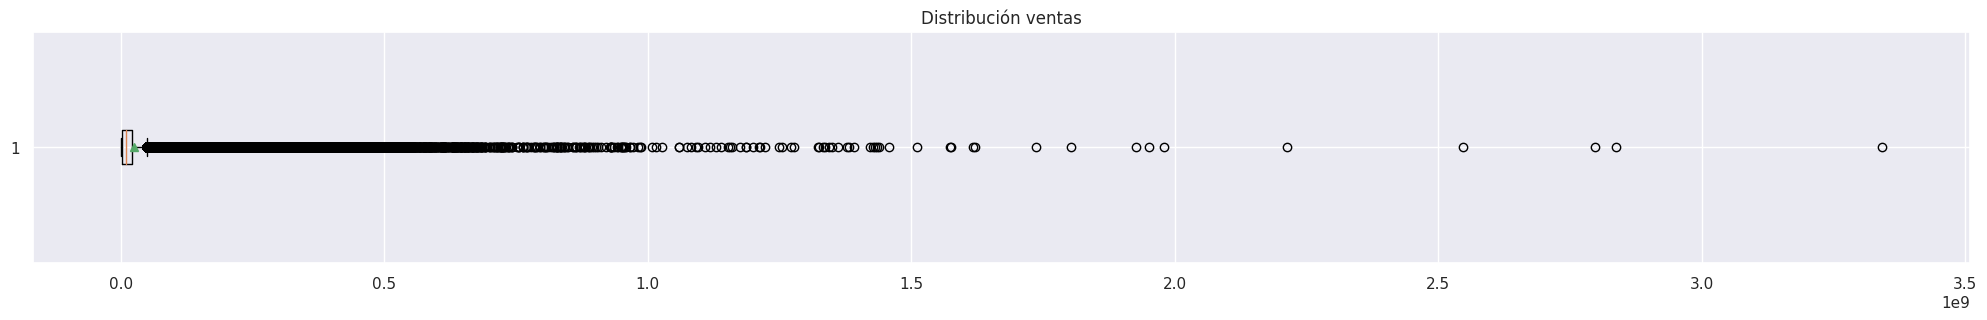

In [ ]:
plt.figure(figsize=(25, 3))
plt.boxplot(dataframe_unificado_final[["ventas"]] , showmeans=True, vert=False)
plt.title("Distribución ventas")
plt.show()

In [ ]:
dataframe_unificado_final['hora_entera'] = dataframe_unificado_final['hora_entera'].astype(int)

In [ ]:
dataframe_unificado_final['hora_entera'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
dataframe_unificado_final['ventas'].unique()

array([ 6666120.,  7080880.,   168060., ..., 14393200.,  9056400.,
        8516600.])

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

X = dataframe_unificado_final.drop(columns=['ventas','muelle','fecha_de_venta','mes_string','tienda','marca','descripcion','objeto1','objeto2','objeto3','objeto4','objeto5','tipo_de_tienda'])
y = dataframe_unificado_final['ventas']
X['transacciones'].fillna(0, inplace=True)

drop_cols = X.isna().sum().to_frame()
drop_cols =drop_cols.loc[drop_cols[0] > 0]
X = X.drop(columns=drop_cols.index.array)
X.isna().sum().to_frame()

X_train = X[X['anio_entero']==2022]
X_test = X[X['anio_entero']==2023]
y_train = y[X['anio_entero']==2022]
y_test = y[X['anio_entero']==2023]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)


 24%|██▍       | 10/42 [05:40<29:31, 55.37s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 26%|██▌       | 11/42 [05:42<20:11, 39.07s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 195. GiB for an array with shape (161603, 161603) and data type float64


 38%|███▊      | 16/42 [08:11<11:41, 26.96s/it]

KernelRidge model failed to execute
Unable to allocate 195. GiB for an array with shape (161603, 161603) and data type float64


 76%|███████▌  | 32/42 [4:37:42<2:17:07, 822.75s/it]  

QuantileRegressor model failed to execute
Unable to allocate 195. GiB for an array with shape (161603, 161603) and data type float64


 98%|█████████▊| 41/42 [7:08:44<15:52, 952.88s/it]   

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,027725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2222
[LightGBM] [Info] Number of data points in the train set: 161603, number of used features: 83
[LightGBM] [Info] Start training from score 22321775,590648


100%|██████████| 42/42 [7:08:48<00:00, 612.58s/it]

                                         Adjusted R-Squared  \
Model                                                         
GradientBoostingRegressor                              0.74   
LGBMRegressor                                          0.73   
HistGradientBoostingRegressor                          0.73   
XGBRegressor                                           0.72   
RandomForestRegressor                                  0.72   
ExtraTreesRegressor                                    0.69   
BaggingRegressor                                       0.69   
KNeighborsRegressor                                    0.68   
Lars                                                   0.49   
Ridge                                                  0.49   
LassoLars                                              0.49   
Lasso                                                  0.49   
RidgeCV                                                0.49   
LassoLarsIC                                            

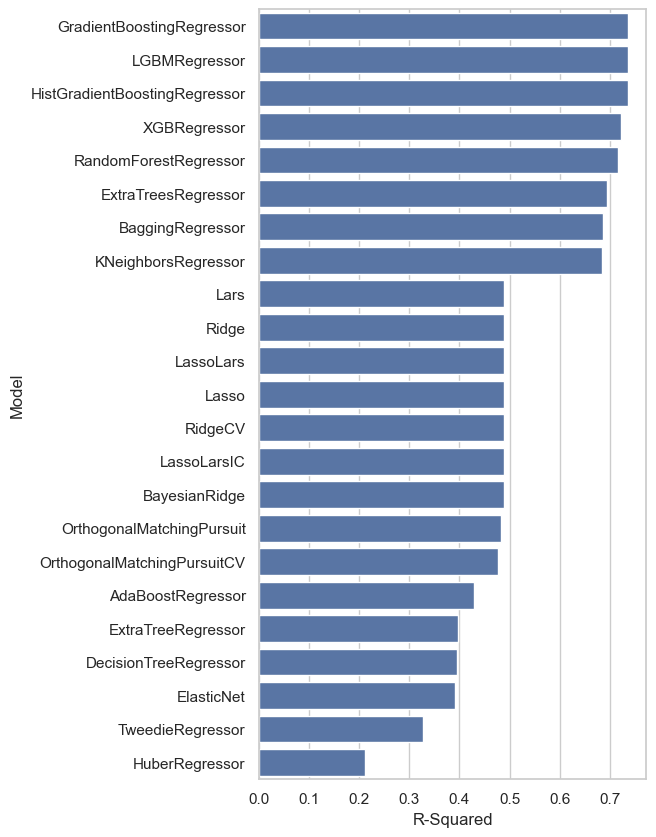

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index[:-15], x="R-Squared", data=predictions[:-15])

In [ ]:
# Armar modelo
regression = GradientBoostingRegressor(random_state=123)
regression.fit(X_train, y_train)

GradientBoostingRegressor(random_state=123)

In [ ]:
# Evaluar con test

print("R2:")
print("Train:", r2_score(y_train, regression.predict(X_train)))
print("Test:", r2_score(y_test, regression.predict(X_test)))

R2:
Train: 0.7200234514172422
Test: 0.731247977060287


In [ ]:
# Mejorar el modelo con hiperparametros
model = GradientBoostingRegressor(random_state=123)
param_dist = {
    'loss': ['squared_error', 'absolute_error'],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, None],
}
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=1, cv=5, n_jobs=-1, scoring='r2', verbose = 1, random_state = 123)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'loss': ['squared_error',
                                                 'absolute_error'],
                                        'max_depth': [3, 4, None],
                                        'n_estimators': [100, 200, 300]},
                   random_state=123, scoring='r2', verbose=1)

In [ ]:
best_model = random_search.best_estimator_
best_model

GradientBoostingRegressor(n_estimators=200, random_state=123)

In [ ]:
random_search.best_params_

{'n_estimators': 200,
 'max_depth': 3,
 'loss': 'squared_error',
 'learning_rate': 0.1}

In [156]:
importances =pd.DataFrame({'feature': X_train.columns.array, 'score': best_model.feature_importances_})
importances.sort_values(by='score', ascending=False, inplace=True)

plot = importances.head(10)

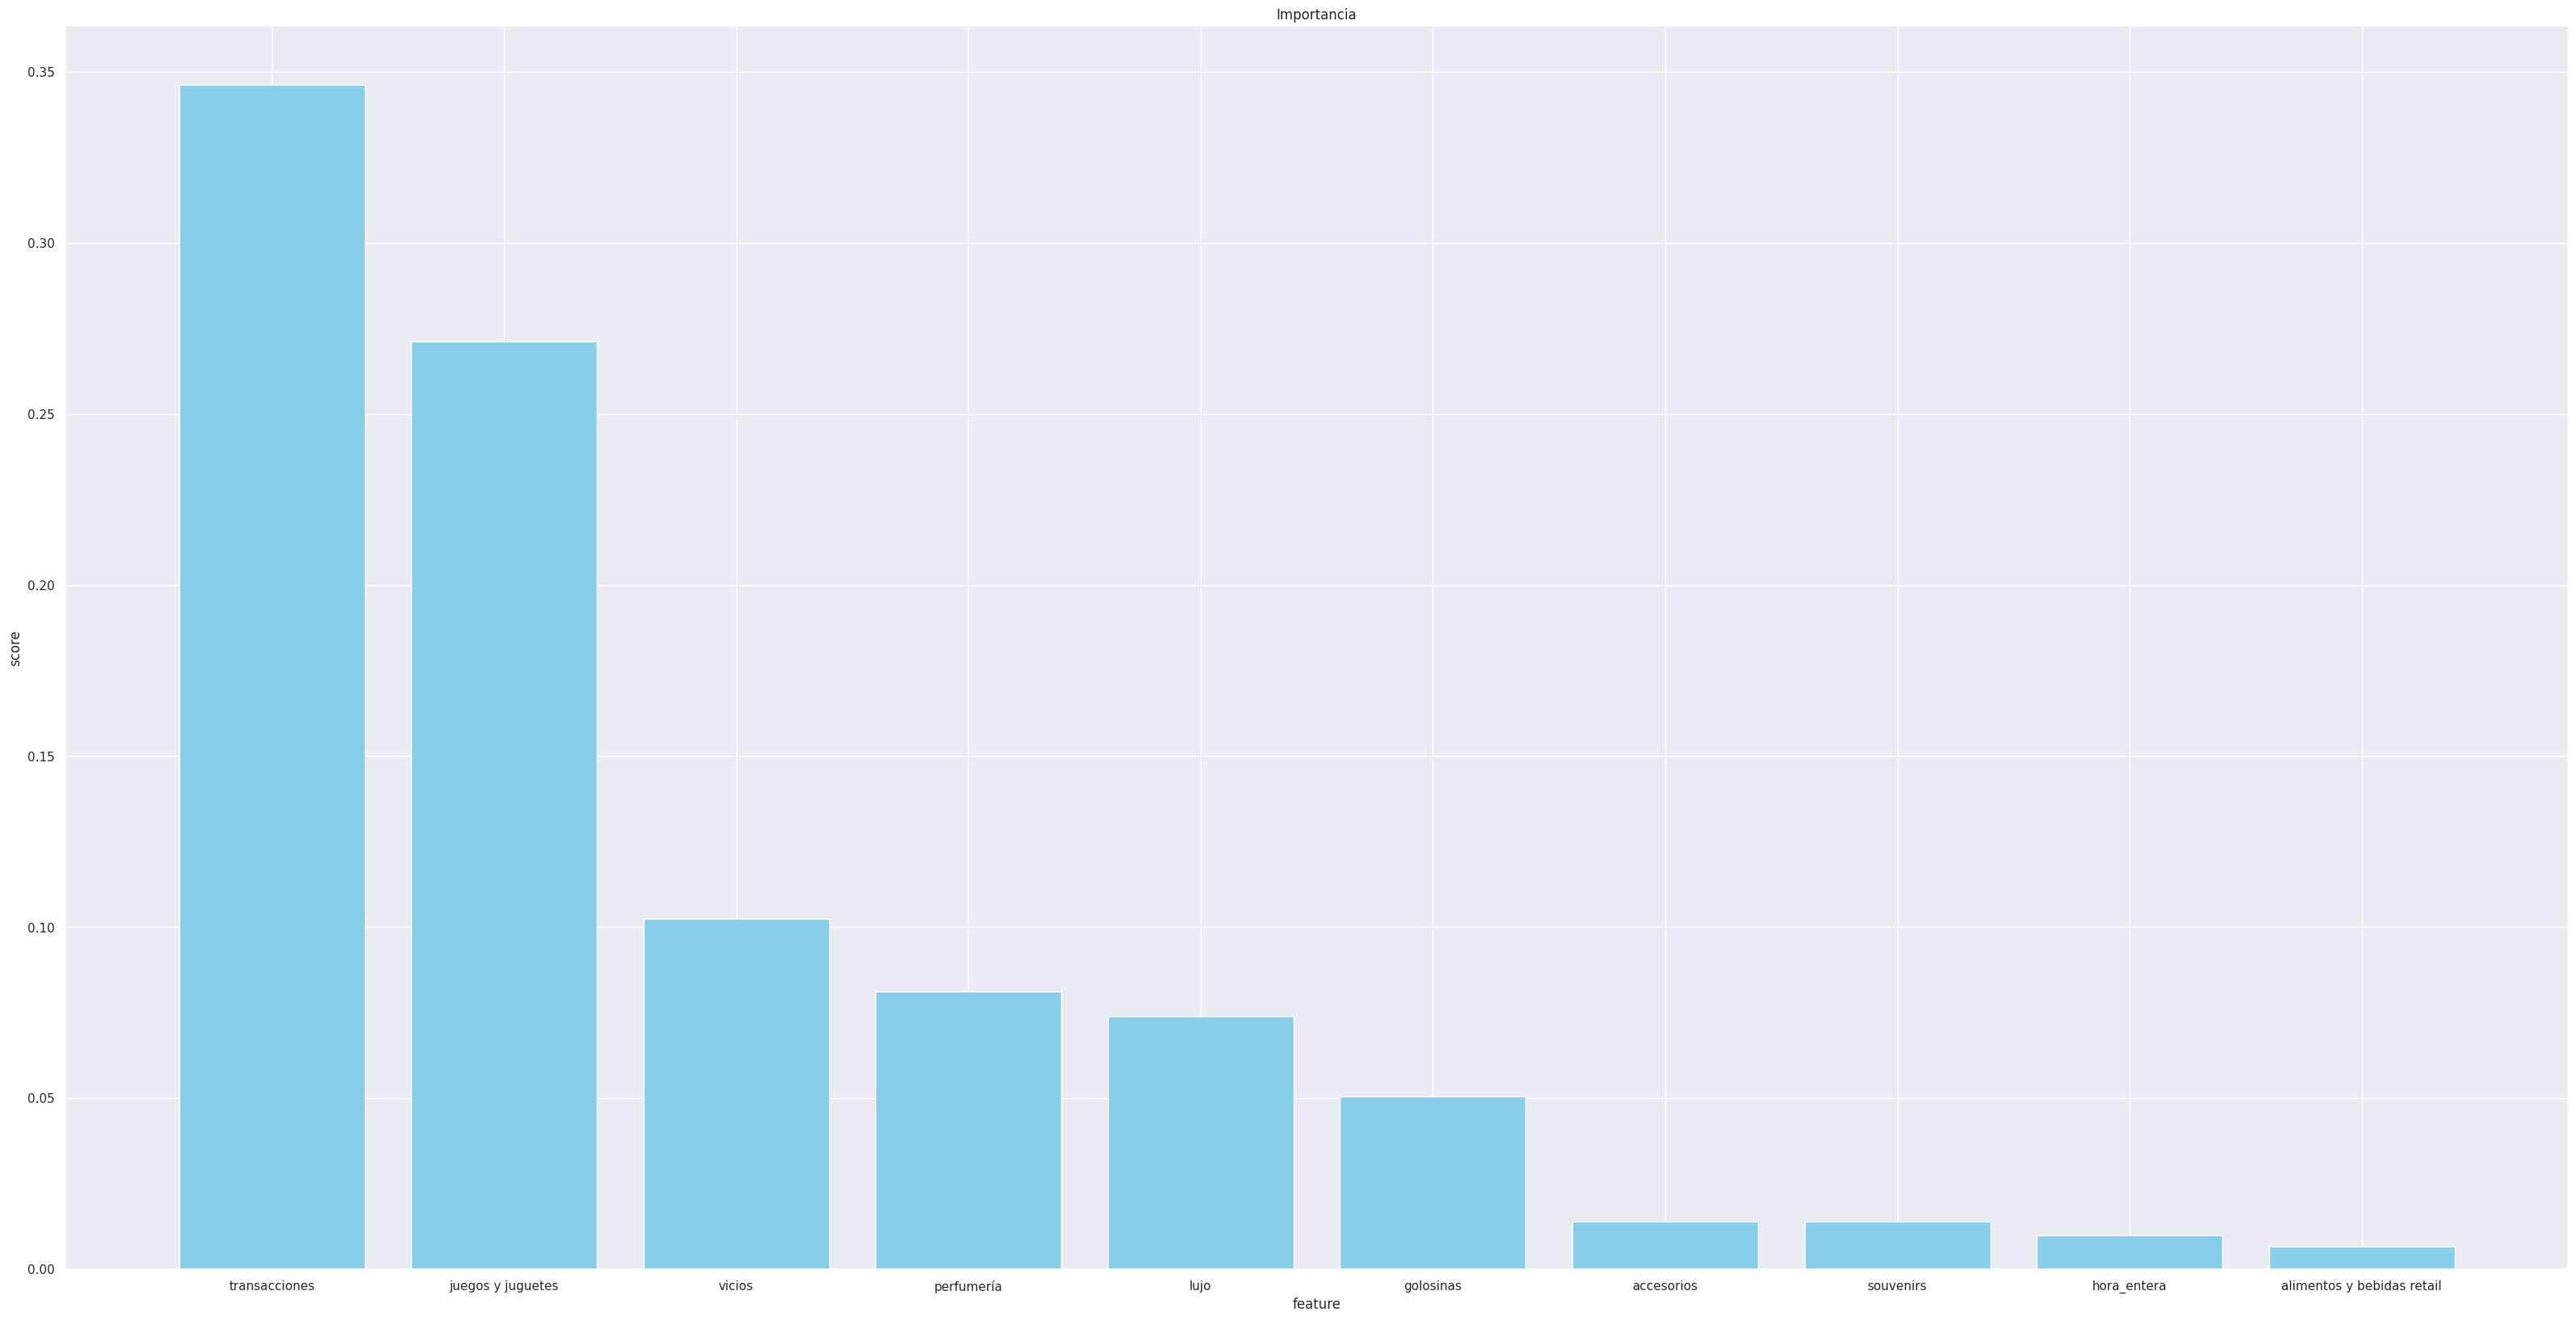

In [157]:
plt.figure(figsize=(40, 20))
plt.bar(plot['feature'], plot['score'], color='skyblue')
plt.xlabel('feature')
plt.ylabel('score')
plt.title('Importancia')

# Mostrar el diagrama de barras
plt.show()

In [ ]:

# Dejar el modelo armado
# Conclusiones